In [205]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [206]:
perch_length=np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
        21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
        22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
        27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
        40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
        110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
        130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
        197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
        514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
        820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
        1000.0, 1000.0]
)



In [207]:
# 그래프 구현

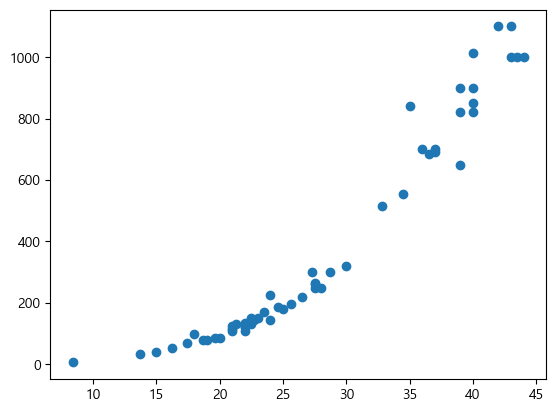

In [208]:
# 0이 있는지 데이터확인
plt.scatter(perch_length,perch_weight)



0의 데이터 있는지 , 직선의 모양이 어떤지를 확인

In [209]:
#데이터 전처리 - train,test세트구성
# 예측률이 고정 random_state=42 랜덤으로 섞는것을 고정시켜서, 예측률이 고정됨.
train_input,test_input,train_target,test_target=train_test_split(
    perch_length,perch_weight,random_state=42
)

In [210]:
# train_input - 2가지 이상의 행렬로 구성, 2차원 행렬로 구성

In [211]:
# 1차원 train_input,test_input -> 2차원의 행렬로 구성
# 2개 이상의 특성값을 가지면 2차원 행렬이 되어 reshape 할 필요가 없음
train_input = train_input.reshape(-1,1)
train_input.shape
test_input = test_input.reshape(-1,1)

In [212]:
# 데이터 훈련 시키기
knr=KNeighborsRegressor() #knr회귀 - 예측 알고리즘을 사용
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [213]:
# 예측무게
predict = knr.predict(test_input)
print('예측값 : ',predict)

예측값 :  [  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


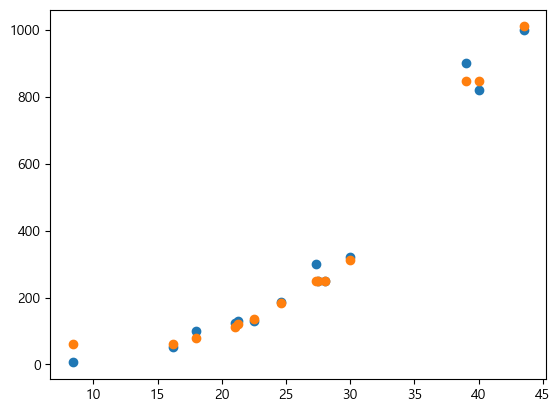

In [214]:
plt.scatter(test_input,test_target) #파란색 실제값
plt.scatter(test_input,predict)     #주황색 예측값

In [215]:
# 과소적합 되었다고 판단, n_neighbors 개수를 줄임
#예측률 구하기


score = knr.score(train_input,train_target)
print(" train 예측률 : ",score)

score = knr.score(test_input,test_target)
print(" test 예측률 : ",score)



 train 예측률 :  0.9698823289099254
 test 예측률 :  0.992809406101064


In [216]:
knr.n_neighbors=3 #5에서 3으로 줄임
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [217]:
# n_neighbors 를 5개에서 3개로 줄임
score = knr.score(train_input,train_target)
print(" train 예측률 : ",score)

score = knr.score(test_input,test_target)
print(" test 예측률 : ",score)

 train 예측률 :  0.9804899950518966
 test 예측률 :  0.9746459963987609


In [218]:
predict = knr.predict([[16.8]])
print(predict)

[62.66666667]


In [219]:
#5부터 5의 배수로 45까지 해서
# 5,10,15,20,25,30,35,40,45 길이를 예측해서 
# 그래프로 출력하시요.


In [220]:
x = np.arange(5, 50, 5).reshape(-1,1)
x


array([[ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45]])

[  60.    60.    60.    95.   193.   311.4  694.2  847.  1010. ]


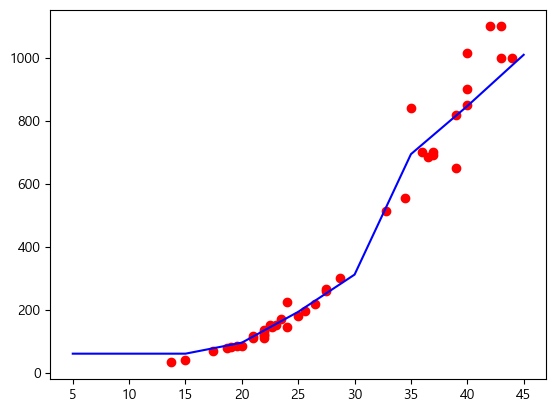

In [228]:
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)
predict = knr.predict(x)
print(predict)
plt.scatter(train_input,train_target,color='r') #파란색 실제값
plt.plot(x,predict,color='blue')
